# Steps of this classification  Model
 **Building A data pipeline**

 **Preprocessing Images for DL**

 **Creating A Deep NN Classifier**

 **Evaluating Model Performance**
 
 **Saving the model for deployment**


# 1 set up and load data

## 1.1 install dependencies and set up

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
aiohttp                      3.9.3
aiosignal                    1.2.0
anyio                        4.3.0
appnope                      0.1.2
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.6.2
Brotli                       1.0.9
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           2.0.4
click                        8.1.7
comm                         0.2.1
contextlib2                  21.6.0
contourpy                    1.2.1
cryptography                 41.0.

In [3]:
import tensorflow as tf
import os

In [4]:
#Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy Images

In [5]:
import cv2
import imghdr

/var/folders/yn/jzzqv3s17t5_glr9g2gqxmyh0000gn/T/ipykernel_7002/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = '/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_multi_class'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [85]:
os.listdir(data_dir)

['Tomato___spider_mites',
 'Strawberry___healthy',
 'Grape___black_rot',
 'Potato___early_blight',
 'Tomato___leaf_curl',
 'Tomato___mosaic_virus',
 'Blueberry___healthy',
 'Sugercane___healthy',
 'Grape___leaf_blight',
 'Cherry___powdery_mildew',
 'Tomato___target_spot',
 '.DS_Store',
 'Peach___healthy',
 'Potato___late_blight',
 'Apple___rust',
 'Tomato___late_blight',
 'Tomato___leaf_mold',
 'Apple___alternaria_leaf_spot',
 'Sugercane___red_rot',
 'Potato___pests',
 'Cassava___healthy',
 'Tomato___bacterial_spot',
 'Grape___healthy',
 'Sugercane___mosaic',
 'Rice___bacterial_blight',
 'Orange___citrus_greening',
 'Tomato___early_blight',
 'Apple___scab',
 'Bell_pepper___bacterial_spot',
 'Potato___bacterial_wilt',
 'Raspberry___healthy',
 'Rice___blast',
 'Tomato___healthy',
 'Corn___northern_leaf_blight',
 'Rice___brown_spot',
 'Cassava___mosaic_disease',
 'Sugercane___rust',
 'Cassava___brown_streak_disease',
 'Cherry___healthy',
 'Rice___tungro',
 'Grape___black_measles',
 'Cassa

In [11]:
for image_class in os.listdir(data_dir):
    print(image_class)

Tomato___spider_mites
Strawberry___healthy
Grape___black_rot
Potato___early_blight
Tomato___leaf_curl
Tomato___mosaic_virus
Blueberry___healthy
Sugercane___healthy
Grape___leaf_blight
Cherry___powdery_mildew
Tomato___target_spot
Peach___healthy
Potato___late_blight
Apple___rust
Tomato___late_blight
Tomato___leaf_mold
Apple___alternaria_leaf_spot
Sugercane___red_rot
Potato___pests
Cassava___healthy
Tomato___bacterial_spot
Grape___healthy
Sugercane___mosaic
Rice___bacterial_blight
Orange___citrus_greening
Tomato___early_blight
Apple___scab
Bell_pepper___bacterial_spot
Potato___bacterial_wilt
Raspberry___healthy
Rice___blast
Tomato___healthy
Corn___northern_leaf_blight
Rice___brown_spot
Cassava___mosaic_disease
Sugercane___rust
Cassava___brown_streak_disease
Cherry___healthy
Rice___tungro
Grape___black_measles
Cassava___bacterial_blight
Apple___brown_spot
Corn___common_rust
Cassava___green_mottle
Bell_pepper___healthy
Peach___bacterial_spot
Apple___gray_spot
Potato___virus
Potato___nemato

In [15]:
os.listdir(os.path.join(data_dir, "Potato___pests"))

['20230712_160121.jpg',
 '20230802_115717636.jpg',
 '20230922_163540.jpg',
 '20230802_115546172.jpg',
 'IMG_1108.JPG',
 'IMG_20230816_140106.jpg',
 '20230802_120341080.jpg',
 'IMG_0202.JPG',
 '20230922_163742.jpg',
 '20230922_163839.jpg',
 '20230712_123408.jpg',
 '1692333303029.jpg',
 '20230712_114924.jpg',
 'IMG_0606.JPG',
 'IMG_0160.JPG',
 '20230712_150155.jpg',
 'IMG_1256.JPG',
 '1692338650721.jpg',
 'IMG_0285 - Copy.JPG',
 'IMG_20230816_141609.jpg',
 'IMG_20230816_135850~2.jpg',
 '20230802_115744.jpg',
 '20230802_115750.jpg',
 'IMG_20230816_140040~2.jpg',
 'IMG_20230816_134527.jpg',
 '1692332350573.jpg',
 'IMG_8298.JPG',
 'IMG_20230816_142642~2.jpg',
 'IMG_1096.JPG',
 '20230712_154044.jpg',
 'IMG_20230816_140113.jpg',
 'IMG_0203.JPG',
 '20230802_115340.jpg',
 'IMG_20230816_142937.jpg',
 'IMG_8307.JPG',
 '20230802_105056702.jpg',
 '20230712_143935.jpg',
 'IMG_0940.JPG',
 'IMG_20230816_134335.jpg',
 'IMG_20230816_134445.jpg',
 '20230802_125929.jpg',
 '20230802_112805894.jpg',
 '20230

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

fa05ccd2-725d-4664-aaca-1c8b69d73b10___Com.G_SpM_FL 1505.JPG
fd3b6292-6d21-4f4a-969f-9ed064e2c451___Com.G_SpM_FL 1415.JPG
82306885-f863-4d0c-983b-9c479a0ff83f___Com.G_SpM_FL 9478.JPG
9c7f0991-5ce9-4460-b75c-5f203f7e62bb___Com.G_SpM_FL 9511.JPG
d7c5cad4-147a-4dc9-9973-e35bfe0e1e8d___Com.G_SpM_FL 8442.JPG
5ce665bf-79e1-4769-847b-4b8f996eb770___Com.G_SpM_FL 8785.JPG
696b9ea7-6925-484c-a6d1-a9e00d8ee732___Com.G_SpM_FL 1407.JPG
5baabb99-9a77-4b9d-b298-b39042a935d3___Com.G_SpM_FL 1397.JPG
2191359a-e985-4bf9-abe2-8f4e00685701___Com.G_SpM_FL 9645.JPG
5475d20a-8571-4b03-a786-0cc0be77c983___Com.G_SpM_FL 1710.JPG
afd11a59-5ed8-4f8d-8e6e-280f6a4deced___Com.G_SpM_FL 8989.JPG
f5eec0e2-699a-484e-91dd-c91f6c03a2c5___Com.G_SpM_FL 8547.JPG
3d59267d-cf74-4354-a41c-d3f79783fcfd___Com.G_SpM_FL 8667.JPG
2db5ec80-9a7d-4963-9aaa-24014848a087___Com.G_SpM_FL 8967.JPG
b3ff8412-603f-47c7-855f-3670ffb84ee5___Com.G_SpM_FL 9266.JPG
92ea86a5-eefd-480b-a00a-b4b791659e6f___Com.G_SpM_FL 9341.JPG
3d39341d-dbcb-4453-b193-

In [ ]:
#to remove .DS_Store
''' 
for item in os.listdir(data_dir):
    # Construct the full path of the item
    item_path = os.path.join(data_dir, item)
    
    # Check if the item is a file and if its name is .DS_Store
    if os.path.isfile(item_path) and item == ".DS_Store":
        # Remove the file
        os.remove(item_path)
'''

In [16]:
img = cv2.imread(os.path.join(data_dir, 'Potato___pests','1692333303029.jpg' ))

In [17]:
type(img)

numpy.ndarray

In [18]:
img.shape

(1500, 1500, 3)

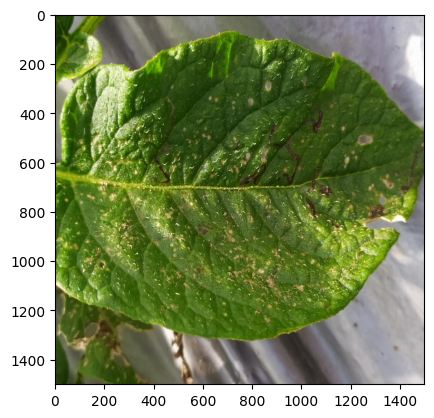

In [19]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))


In [111]:
os.makedirs('no_disease')

## 1.3 Load Data

In [21]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [22]:
import numpy as np

In [23]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 95468 files belonging to 60 classes.


In [24]:
data_iterator = data.as_numpy_iterator()

In [25]:
#get another batch from itearator
batch = data_iterator.next()

In [26]:
#images representes as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [27]:

batch[1]

array([40, 14, 50, 53, 26, 26, 14, 30, 41, 14, 51,  3, 11, 51, 30, 41,  3,
       14, 35, 29, 46, 31, 18, 26, 14, 26, 23, 33, 25, 41, 14, 44],
      dtype=int32)

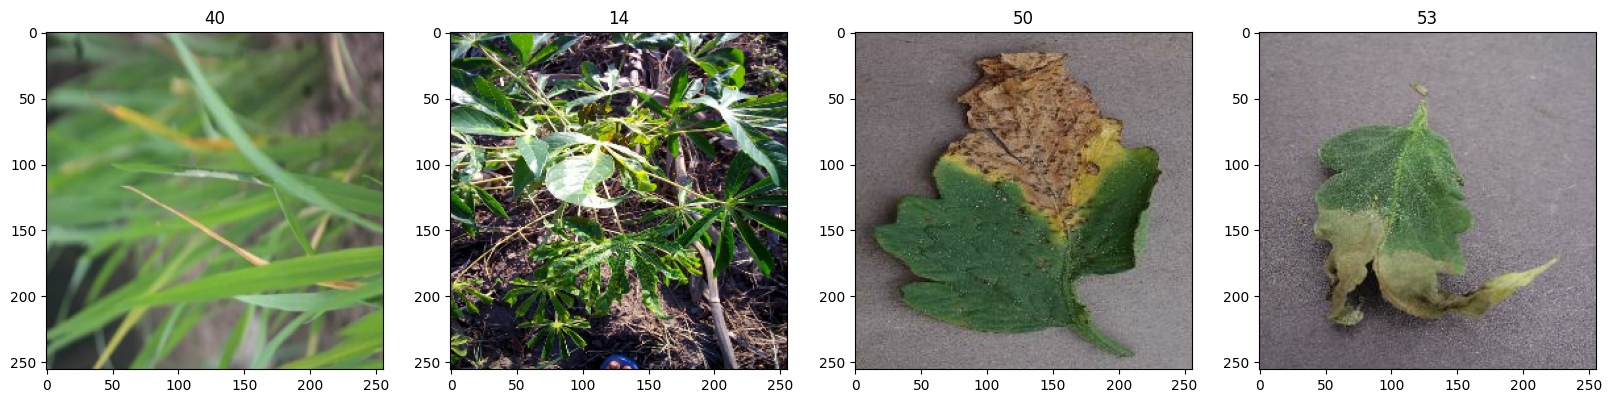

In [28]:

fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 Preprocess Data

In [29]:
scaled = batch[0]/255

In [30]:
scaled.min()

0.0

In [31]:
scaled.max()

1.0

## 2.1 Scale Data

In [32]:
data = data.map(lambda x,y: (x/255, y))

In [33]:
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

In [35]:
batch[0].max()

1.0

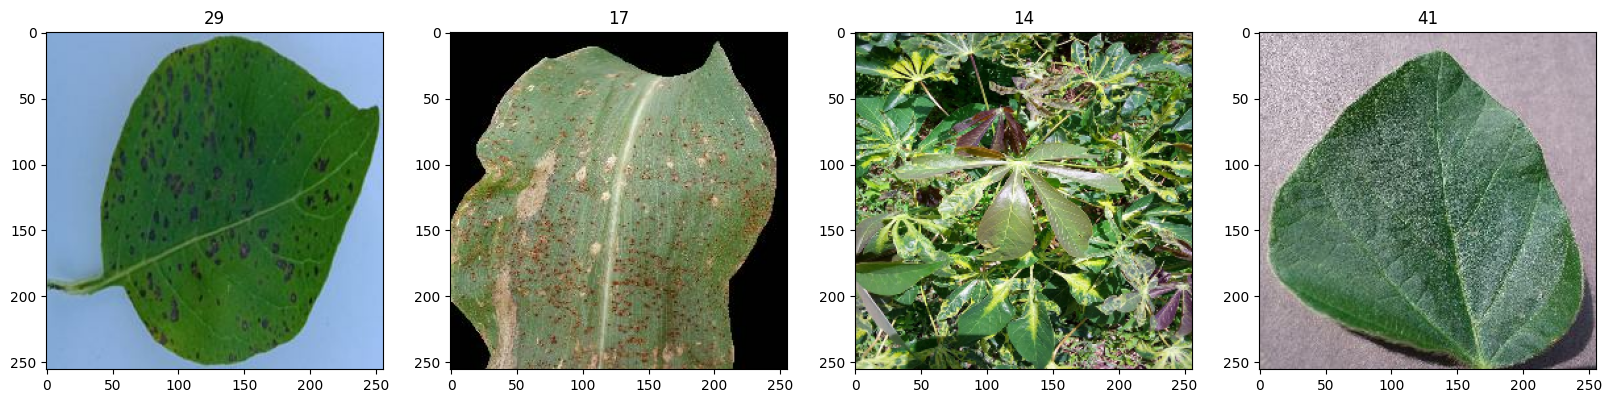

In [36]:
# 0 = disease
# 1 = no disease
fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split data

In [37]:
len(data)

2984

In [41]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [42]:
print(train_size)
print(val_size)
print(test_size)

2088
597
299


In [43]:
train_size + val_size + test_size

2984

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

## 3.1 Build Deep Learning Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
model = Sequential()

In [ ]:
MaxPooling2D??

In [48]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(60, activation='softmax'))

In [ ]:
Dense??

In [49]:
model.compile('adam', loss= tf.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 123, 123, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 59, 59, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       692,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │        15,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 726,876 (2.77 MB)

 Trainable params: 726,876 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [51]:
logdir = 'logs'

In [52]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [53]:
hist = model.fit(train, epochs= 20, validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 1247s 596ms/step - accuracy: 0.4174 - loss: 2.2221 - val_accuracy: 0.7056 - val_loss: 0.9314
Epoch 2/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 3424s 2s/step - accuracy: 0.7341 - loss: 0.8250 - val_accuracy: 0.7531 - val_loss: 0.7542
Epoch 3/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 228s 109ms/step - accuracy: 0.8029 - loss: 0.5896 - val_accuracy: 0.7981 - val_loss: 0.6280
Epoch 4/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 255s 122ms/step - accuracy: 0.8374 - loss: 0.4765 - val_accuracy: 0.7882 - val_loss: 0.6684
Epoch 5/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 272s 130ms/step - accuracy: 0.8611 - loss: 0.4041 - val_accuracy: 0.8031 - val_loss: 0.6466
Epoch 6/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 284s 136ms/step - accuracy: 0.8838 - loss: 0.3330 - val_accuracy: 0.8149 - val_loss: 0.6568
Epoch 7/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 272s 130ms/step - accuracy: 0.8993 - loss: 0.2867 - val_accuracy: 0.8148 - val_loss: 0.7035
Epoch 8/20
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 249s 119ms/step - acc

## 3.3 Plot Performance

In [54]:
hist.history

{'accuracy': [0.5568576455116272,
  0.7557471394538879,
  0.812799334526062,
  0.8448126316070557,
  0.8679059147834778,
  0.8867337107658386,
  0.9033315181732178,
  0.9170408248901367,
  0.9273676872253418,
  0.935584306716919,
  0.9438158273696899,
  0.9502514600753784,
  0.9540080428123474,
  0.957779586315155,
  0.9617905616760254,
  0.9623742699623108,
  0.9647090435028076,
  0.9665948152542114,
  0.9691091775894165,
  0.9704711437225342],
 'loss': [1.5607341527938843,
  0.7490746974945068,
  0.5573646426200867,
  0.453804612159729,
  0.3832063376903534,
  0.3254935145378113,
  0.2767783999443054,
  0.2355600744485855,
  0.2078685462474823,
  0.1827716827392578,
  0.16333618760108948,
  0.14397743344306946,
  0.13415026664733887,
  0.12716111540794373,
  0.11608851701021194,
  0.1126229390501976,
  0.10480440407991409,
  0.10229513049125671,
  0.09565419703722,
  0.09051197022199631],
 'val_accuracy': [0.7055590748786926,
  0.7531406879425049,
  0.7980527877807617,
  0.7881595492

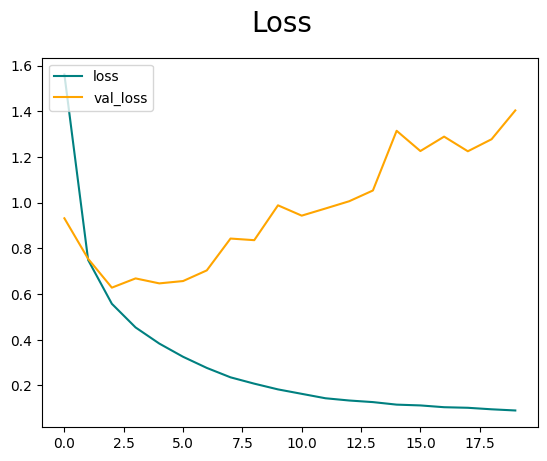

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'],color= 'teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize= 20)
plt.legend(loc='upper left')
plt.show()

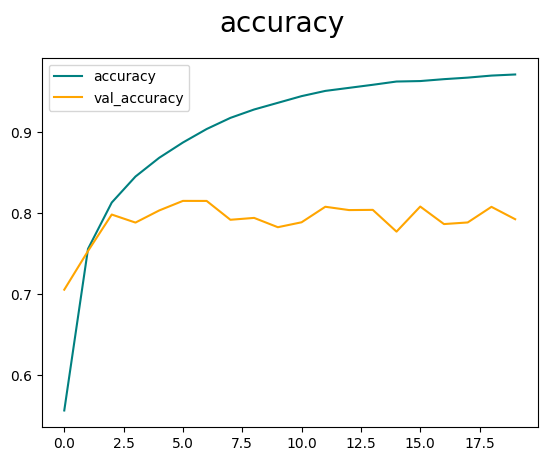

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color= 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize= 20)
plt.legend(loc='upper left')
plt.show()

# 4 Evaluate Performance

## 4.1 Evaluate

In [64]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [66]:
len(test)

299

In [68]:
y_pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [70]:
y_pred.shape

(32, 60)

In [71]:
y.shape

(32,)

In [73]:
from tensorflow.keras.utils import to_categorical
# Initialize metrics for multi-class classification
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Iterate over the test dataset
for batch in test.as_numpy_iterator(): 
    X, y_true = batch
    y_pred = model.predict(X)
    
    # Perform one-hot encoding on true labels
    y_true_one_hot = to_categorical(y_true, num_classes=60)
    
    # Update metrics
    pre.update_state(y_true_one_hot, y_pred)
    re.update_state(y_true_one_hot, y_pred)
    acc.update_state(y_true_one_hot, y_pred)

# Compute and print the final results
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

2024-05-07 14:00:41.917872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## 4.2 Test

In [74]:
import cv2

#### disease test

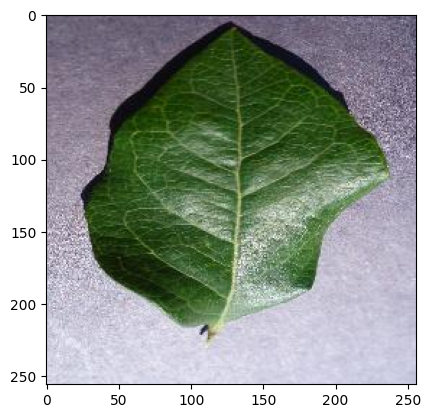

In [75]:
img = cv2.imread('/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_multi_class/Blueberry___healthy/0a8febf2-434f-4723-8fbd-9482eb1f2aec___RS_HL 5504.JPG')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

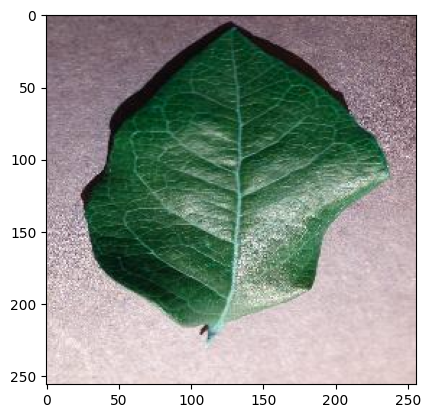

In [76]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
# Preprocess the resized image
resize_normalized = resize / 255.0  # Normalize pixel values
resize_normalized = np.expand_dims(resize_normalized, axis=0)  # Add batch dimension


In [81]:
predictions = model.predict(resize_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [88]:
predicted_class_index = np.argmax(predictions, axis=1)[0]

In [89]:
class_labels = ['Tomato___spider_mites',
 'Strawberry___healthy',
 'Grape___black_rot',
 'Potato___early_blight',
 'Tomato___leaf_curl',
 'Tomato___mosaic_virus',
 'Blueberry___healthy',
 'Sugercane___healthy',
 'Grape___leaf_blight',
 'Cherry___powdery_mildew',
 'Tomato___target_spot',
 '.DS_Store',
 'Peach___healthy',
 'Potato___late_blight',
 'Apple___rust',
 'Tomato___late_blight',
 'Tomato___leaf_mold',
 'Apple___alternaria_leaf_spot',
 'Sugercane___red_rot',
 'Potato___pests',
 'Cassava___healthy',
 'Tomato___bacterial_spot',
 'Grape___healthy',
 'Sugercane___mosaic',
 'Rice___bacterial_blight',
 'Orange___citrus_greening',
 'Tomato___early_blight',
 'Apple___scab',
 'Bell_pepper___bacterial_spot',
 'Potato___bacterial_wilt',
 'Raspberry___healthy',
 'Rice___blast',
 'Tomato___healthy',
 'Corn___northern_leaf_blight',
 'Rice___brown_spot',
 'Cassava___mosaic_disease',
 'Sugercane___rust',
 'Cassava___brown_streak_disease',
 'Cherry___healthy',
 'Rice___tungro',
 'Grape___black_measles',
 'Cassava___bacterial_blight',
 'Apple___brown_spot',
 'Corn___common_rust',
 'Cassava___green_mottle',
 'Bell_pepper___healthy',
 'Peach___bacterial_spot',
 'Apple___gray_spot',
 'Potato___virus',
 'Potato___nematode',
 'Potato___phytophthora',
 'Tomato___septoria_leaf_spot',
 'Corn___healthy',
 'Squash___powdery_mildew',
 'Corn___gray_leaf_spot',
 'Apple___black_rot',
 'Sugercane___yellow_leaf',
 'Apple___healthy',
 'Strawberry___leaf_scorch',
 'Potato___healthy',
 'Soybean___healthy']

In [90]:
predicted_class_label = class_labels[predicted_class_index]

In [91]:
print('Predicted disease is ', predicted_class_label)

Predicted disease is  Cherry___powdery_mildew


In [93]:
print('Probabilities for all classes:')
for i, prob in enumerate(predictions[0]):
    print(f'Class{i + 1}: {prob:.4f}')

Probabilities for all classes:
Class1: 0.0000
Class2: 0.0000
Class3: 0.0000
Class4: 0.0000
Class5: 0.0000
Class6: 0.0000
Class7: 0.0000
Class8: 0.0000
Class9: 0.0000
Class10: 0.9999
Class11: 0.0000
Class12: 0.0000
Class13: 0.0000
Class14: 0.0000
Class15: 0.0000
Class16: 0.0000
Class17: 0.0000
Class18: 0.0000
Class19: 0.0000
Class20: 0.0000
Class21: 0.0000
Class22: 0.0000
Class23: 0.0000
Class24: 0.0000
Class25: 0.0000
Class26: 0.0000
Class27: 0.0000
Class28: 0.0000
Class29: 0.0000
Class30: 0.0000
Class31: 0.0000
Class32: 0.0000
Class33: 0.0000
Class34: 0.0000
Class35: 0.0000
Class36: 0.0000
Class37: 0.0000
Class38: 0.0000
Class39: 0.0000
Class40: 0.0000
Class41: 0.0000
Class42: 0.0000
Class43: 0.0000
Class44: 0.0000
Class45: 0.0000
Class46: 0.0000
Class47: 0.0000
Class48: 0.0000
Class49: 0.0000
Class50: 0.0000
Class51: 0.0000
Class52: 0.0000
Class53: 0.0000
Class54: 0.0000
Class55: 0.0000
Class56: 0.0000
Class57: 0.0000
Class58: 0.0000
Class59: 0.0000
Class60: 0.0000


### fungal disease test

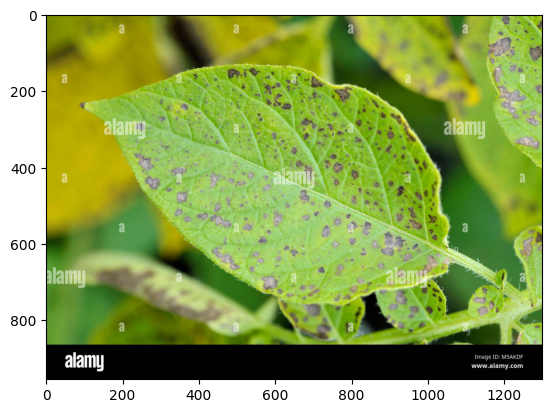

In [101]:
img1 = cv2.imread('/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/potato-leaf.jpeg')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

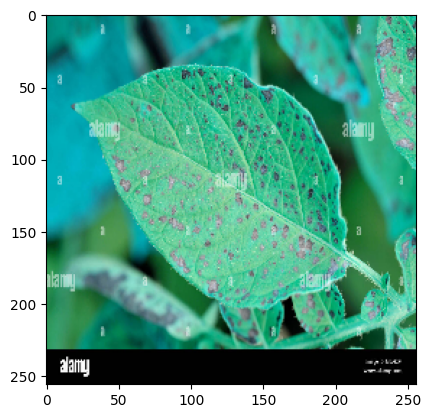

In [102]:
resize1 = tf.image.resize(img1,(256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [103]:
# Preprocess the resized image
resize_normalized = resize1 / 255.0  # Normalize pixel values
resize_normalized = np.expand_dims(resize_normalized, axis=0)  # Add batch dimension


In [104]:
prediction_new = model.predict(resize_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [105]:
predicted_class_index = np.argmax(prediction_new, axis=1)[0]

In [106]:
predicted_class_label = class_labels[predicted_class_index]

In [107]:
print('Predicted disease is ', predicted_class_label)

Predicted disease is  Peach___healthy


# 5.Save the model

In [108]:
from tensorflow.keras.models import load_model

In [109]:
model.save(os.path.join('models','mutil_class_classification_model.h5'))

In [110]:
new_model = load_model(os.path.join('models','mutil_class_classification_model.h5'))